In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import pandas as pd

# 1. Постановка задачи

Линейная модель - это: $$ \hat{y} = f(x) = \theta_0*1 + \theta_1*x_1 + ... + \theta_n*x_n = \theta^T*X$$

Сгенерируем исскуственные данные, на основе функции:
$$f(x) = 4x+5$$

In [4]:
def lin_function(x):
    return 4*x+5

x_true = np.array([-2,2])
y_true = lin_function(x_true)


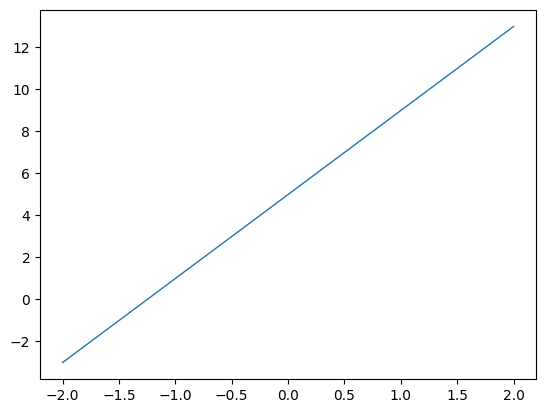

In [5]:
plt.plot(x_true, y_true, linewidth=1)
plt.show()

In [6]:
n = 100
x = np.random.rand(n, 1) * 4 - 2
e = np.random.rand(n, 1) * 4 - 2
y = lin_function(x) + e


In [7]:
y.shape

(100, 1)

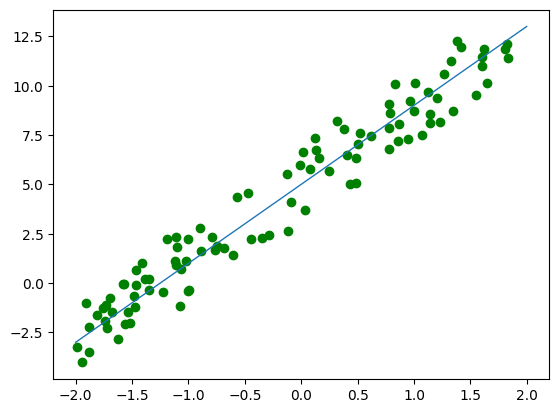

In [8]:
plt.scatter(x, y, color='g')
plt.plot(x_true, y_true, linewidth=1)
plt.show()

# 2. Аналитический метод поиска минимума по МНК

$$MSE -> min $$

$$MSE = \frac1N \sum_{i = 1}^N(\hat y_i - y_i)^2 = \frac1N \sum_{i = 1}^N(\theta_i * x_i - y_i)^2 = \frac1N ||X \theta - Y||_2 = \frac1N (X\theta - Y)^T*(X\theta - Y) $$



$$ \frac{d}{d\theta}[\frac1N (X\theta - Y)^T*(X\theta - Y)] =  \frac1N \frac{d}{d\theta}[Y^TY - 2Y^TX\theta+\theta^TX^TX\theta]  $$

$$\hat \theta = \bigl(X^T \cdot X  \bigr)^{-1} \cdot X^T \cdot y $$

 # 3. Градиентный спуск

$$\theta^{(t+1)} = \theta^{(t)} - lr\cdot \nabla MSE(\theta^{(t)}),$$
где $lr$ — длина шага градиентного спуска (learning rate).

$$\nabla MSE(\theta)= \frac{2}{N} X^T \cdot \bigl(X \cdot \theta - Y \bigr) $$

In [9]:
o = np.ones((5,3))

z = np.zeros((5,3))

print(o,'\n\n',z,'\n\n',np.hstack((o,z)))

[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]] 

 [[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]] 

 [[1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]
 [1. 1. 1. 0. 0. 0.]]


# Создание модели

In [10]:
class SimpleLinearRegression():
    def __init__(self, X, y):
        self._X = np.hstack([np.ones((X.shape[0],1)),X])
        self._y = y
        self._theta = np.random.randn(self._X.shape[1],1)

    def predict(self,X):
        X = np.hstack([np.ones((X.shape[0],1)),X])
        return X @ self._theta

    def mse(self, y_diff):
        return np.sum(np.square(y_diff)) / y_diff.shape[0]
    
    def backward(self, lr, y_diff):
        grad = (2 / y_diff.shape[0]) * self._X.T @ y_diff
        self._theta = self._theta - lr * grad
     
    def fit(self, lr = 0.01, iterations = 1000):
        losses = []
        for i in range(iterations):
            y_pred = self._X @ self._theta
            y_diff = y_pred - self._y
            losses.append(self.mse(y_diff))

            self.backward(lr, y_diff)

            if (i + 1) % 100 == 0:
                print('Cost at iteration number '+str(i+1)+' is : ', losses[i])

        plt.title('cost v/s iteration')
        plt.plot(losses)
        plt.xlabel('no. of iterations')
        plt.ylabel('cost')
        plt.show()

In [11]:
model=SimpleLinearRegression(x, y)

Cost at iteration number 100 is :  2.878619404229479
Cost at iteration number 200 is :  1.1798177371831415
Cost at iteration number 300 is :  1.1358833698918271
Cost at iteration number 400 is :  1.1347465815296247
Cost at iteration number 500 is :  1.1347171662007736
Cost at iteration number 600 is :  1.1347164050521612
Cost at iteration number 700 is :  1.1347163853567361
Cost at iteration number 800 is :  1.134716384847099
Cost at iteration number 900 is :  1.1347163848339117
Cost at iteration number 1000 is :  1.1347163848335704


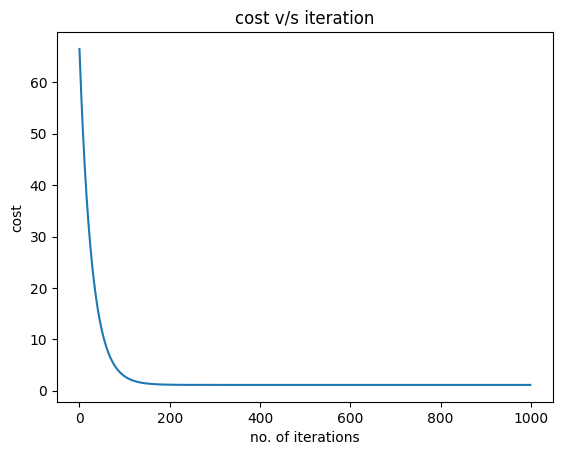

In [12]:
model.fit()

[[-2.64621107]
 [12.63417339]]


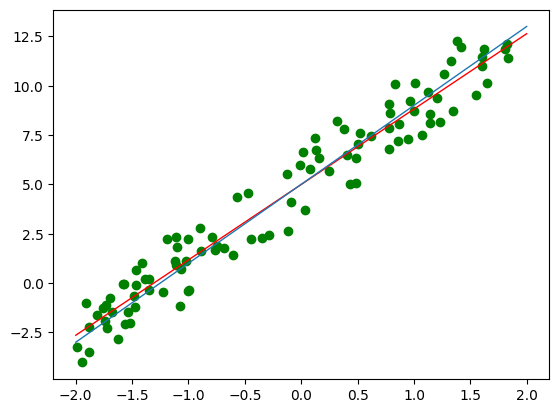

In [13]:
plt.scatter(x, y, color='g')
x_true = np.array([-2, 2])
x_matrix = np.resize(x_true,(2, 1))
y_pred=model.predict(x_matrix)
print(y_pred)

plt.plot(x_true, y_pred, linewidth=1, color='r')
plt.plot(x_true, y_true, linewidth=1)

In [14]:
data = pd.read_csv("Student_Marks.csv")
data.head()

,number_courses,time_study,Marks
0,3,4.508,19.202
1,4,0.096,7.734
2,4,3.133,13.811
3,6,7.909,53.018
4,8,7.811,55.299


In [15]:
y = data['Marks']
X = data.drop(['Marks'],axis = 1)

In [16]:
y.head()

0    19.202
1     7.734
2    13.811
3    53.018
4    55.299
Name: Marks, dtype: float64

In [17]:
X.head()

,number_courses,time_study
0,3,4.508
1,4,0.096
2,4,3.133
3,6,7.909
4,8,7.811


In [18]:
y = y.to_numpy()
X = X.to_numpy()

y_test = y[0, np.newaxis]
X_test = X[np.newaxis,0]

y_train = y[1:, np.newaxis]
X_train = X[1:]

y_train.shape

(99, 1)

In [19]:
model = SimpleLinearRegression(X_train, y_train)

Cost at iteration number 100 is :  15.585586342343687
Cost at iteration number 200 is :  14.557873336694788
Cost at iteration number 300 is :  13.835632142430871
Cost at iteration number 400 is :  13.328062330784599
Cost at iteration number 500 is :  12.97135723594783
Cost at iteration number 600 is :  12.720675414919468
Cost at iteration number 700 is :  12.54450362398149
Cost at iteration number 800 is :  12.420695284808854
Cost at iteration number 900 is :  12.333686435281498
Cost at iteration number 1000 is :  12.272539181819699


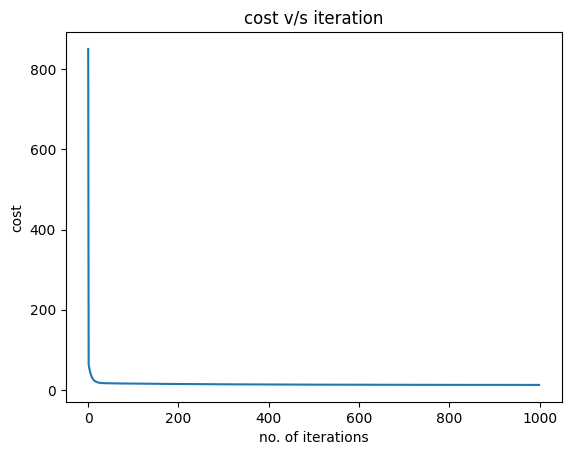

In [20]:
model.fit()

In [21]:
model.predict(X_test)

array([[23.06598181]])

In [22]:
y_test

array([19.202])